## Rede Neural artificial

- Rede neural que verifica em uma base de dados que contem a idade de varias pessoas e de acordo com isso ela tenta decidir se a pessoa tem maior probabilidade de aceitar um seguro ou não.

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # para gerar os mesmos números aleatórios
ages = np.random.randint(low=15, high=70, size=40) # 40 pessoas entre 15 e 70 anos

In [43]:
ages

array([53, 66, 43, 29, 57, 22, 35, 53, 33, 37, 25, 25, 38, 67, 50, 54, 38,
       17, 36, 67, 16, 38, 58, 44, 52, 16, 35, 47, 26, 36, 58, 39, 63, 41,
       56, 42, 30, 29, 61, 65])

In [44]:
labels = [] # lista de rótulos (0 ou 1) para cada pessoa.
for age in ages:
    if age < 30:
        labels.append(0) # Menos probabiliza de ter o seguro
    else:
        labels.append(1) # Mais probabiliza de ter o seguro

In [45]:
# Embaralhar mais os dados, pegando 3 pessoas aleatórias e trocando seus rótulos
for i in range(0, 3):
    r = np.random.randint(0, len(labels) - 1)
    if labels[r] == 0:
        labels[r] = 1
    else:
        labels[r] = 0    

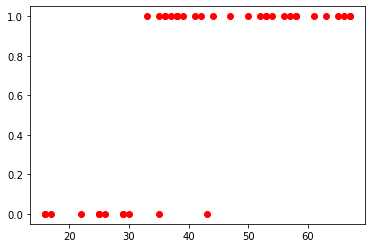

In [46]:
# Plotar os dados em um gráfico de dispersão
plt.scatter(ages, labels, color='red')
plt.show()

In [47]:
# predição com regressão linear
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(ages.reshape(-1, 1), labels)

LinearRegression()

In [48]:
# Equação da reta: y = m.x + b
m = model.coef_[0] # coeficiente angular (inclinação)
b = model.intercept_ # coeficiente linear (intercepto)

m, b

(0.022566752303713265, -0.2573944664850353)

- Gerar animação para mostrar o ajuste da reta de regressão linear.

MovieWriter ffmpeg unavailable; using Pillow instead.


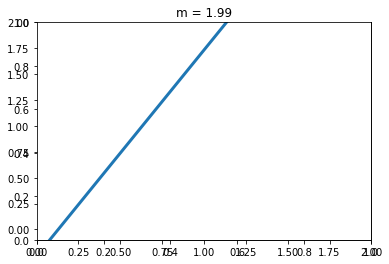

In [49]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()

# marking the x-axis and y-axis  
axis = plt.axes(xlim =(0, 2),  
                ylim =(-0.1, 2))

# initializing a line variable  
line, = axis.plot([], [], lw = 3)  

# data which the line will  
# contain (x, y)  
def init():  
    line.set_data([], [])  
    return line,  

def animate(i):
    m_copy = i * 0.01
    plt.title('m = ' + str(m_copy))
    x = np.arange(0.0, 10.0, 0.1)
    y = m_copy * x + b
    line.set_data(x, y)  

    return line,

ani = FuncAnimation(fig, animate, init_func = init,  
                    frames = 200,  
                    interval = 20,  
                    blit = True)

ani.save('m.png', writer = 'ffmpeg', fps = 30) 


HTML("""
<div align="middle">
<img width="80%" controls>
      <source src="m.png" type="video/mp4">
</img></div>""")       

- Regressão liner dos pontos obtidos (m e b)

In [ ]:
plt.plot(ages, ages * m + b, color='blue')
plt.scatter(ages, labels, color='red')
plt.show()

* 0.5 = m.x + b
* 0.5 - b = m.x
* (0.5 - b) / m = x

In [ ]:
limiar_idade = (0.5 - b) / m
limiar_idade

plt.plot(ages, ages * m + b, color='blue')
plt.plot([limiar_idade, limiar_idade], [0, 0.5],'--', color='green')
plt.scatter(ages, labels, color='red')
plt.show()


- Função logística

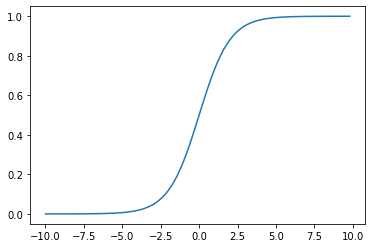

In [31]:
import math
def sigmoid(x):
    a = []
    for item in x:
        a.append(1 / (1 + math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)

plt.plot(x,sig)
plt.show()


- Classificador sigmoidal

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(ages.reshape(-1, 1), labels)

m = model.coef_[0][0]
b = model.intercept_[0]

x = np.arange(0, 70, 0.1)
sig = sigmoid(x * m + b)

limiar_idade = abs(b / m)
print(limiar_idade)

plt.scatter(ages, labels, color='red')
plt.plot([limiar_idade, limiar_idade], [0, 0.5],'--', color='green')
plt.plot(x, sig)
